In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import losses, metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ?? It has already been preprocessed: 
# the reviews (sequences of words) have been turned into sequences of integers, 
# where each integer stands for a specific word in a dictionary.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print("encoded review")
print(f"type(train_data) : {type(train_data)}")
print(f"train_data.shape : {train_data.shape}")
print(f"train_labels[0]  : {train_labels[0]}")
print(f"train_data[0]    : {train_data[0]}")
print()

print("decoded review")
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "\n") for i in train_data[0]])
print(f"{decoded_review}")
print()

encoded review
type(train_data) : <class 'numpy.ndarray'>
train_data.shape : (25000,)
train_labels[0]  : 1
train_data[0]    : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 1

In [4]:
# ?? Can repetition of the same word be considered?
# ?? dimension=10000
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f"type(x_train)    : {type(x_train)}")
print(f"x_train.shape    : {x_train.shape}")

type(x_train)    : <class 'numpy.ndarray'>
x_train.shape    : (25000, 10000)


In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-15 00:38:04.021713: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-15 00:38:04.021823: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

2022-05-15 00:38:04.561587: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-15 00:38:04.561799: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-15 00:38:04.692631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5207 - binary_accuracy: 0.7903 - val_loss: 0.4076 - val_binary_accuracy: 0.8510
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3762 - binary_accuracy: 0.8652

2022-05-15 00:38:05.457353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 19ms/step - loss: 0.3120 - binary_accuracy: 0.9000 - val_loss: 0.3059 - val_binary_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2247 - binary_accuracy: 0.9263 - val_loss: 0.2819 - val_binary_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1776 - binary_accuracy: 0.9410 - val_loss: 0.2752 - val_binary_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1431 - binary_accuracy: 0.9547 - val_loss: 0.2808 - val_binary_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1167 - binary_accuracy: 0.9635 - val_loss: 0.3371 - val_binary_accuracy: 0.8736
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0938 - binary_accuracy: 0.9731 - val_loss: 0.3133 - val_binary_accuracy: 0.8841
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0765 -

history dict: dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


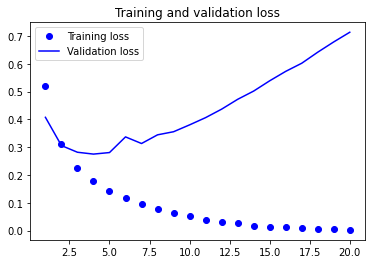

In [11]:
history_dict = history.history
print(f"history dict: {history_dict.keys()}")

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

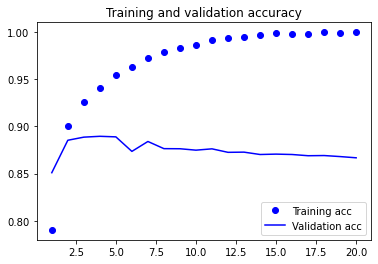

In [12]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [13]:
results = model.evaluate(x_test, y_test)
print(f"test loss, test accuracy : {results}")

782/782 [==============================] - 3s 4ms/step - loss: 0.7861 - binary_accuracy: 0.8523
test loss, test accuracy : [0.7860896587371826, 0.8522800803184509]


In [14]:
history = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512)

Epoch 1/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2145 - binary_accuracy: 0.9453
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1248 - binary_accuracy: 0.9620
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.0942 - binary_accuracy: 0.9712
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0708 - binary_accuracy: 0.9785


In [15]:
results = model.evaluate(x_test, y_test)
print(f"test loss, test accuracy : {results}")

782/782 [==============================] - 3s 4ms/step - loss: 0.5172 - binary_accuracy: 0.8633
test loss, test accuracy : [0.5172181725502014, 0.8632800579071045]
